TASK 1: EDA Assignment on Retail Data Sales

Name: Swetha G

Domain: Data Analytics

Oasis Infobyte Internship

### <span style='color:orange'> Case Study Explanation </span>

<span style='color:orange'> Problem Statement </span>: Identify patterns and factors influencing customer spending and product preferences to optimize sales strategies and enhance customer satisfaction in a retail setting.

### <span style='color:green'> Steps for EDA </span>
1. Importing Libraries
2. Data Loading
3. Data Understanding 
4. Missing Value check
5. Segmentation of Columns
6. Analysis:
    - Univariate Analysis (One variable at a time)
    - Bivariate Analysis (Two varaible at a time)
    - Multivariate Analysis (More than two variable at a time)

### Step 1: Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
### Read the file

sales_df = pd.read_csv("/Users/swethag/Desktop/@Upgrad_Data_Science/Oasis Internship/retail_sales_dataset.csv")

### Step 2: Data Loading & Data Understanding

In [9]:
sales_df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [10]:
sales_df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [11]:
sales_df.shape

(1000, 9)

In [13]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [33]:
### Need to change the data type of Date column 
sales_df.Date = pd.to_datetime(sales_df.Date)

In [35]:
sales_df.dtypes

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

In [40]:
sales_df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

### Step 3: Missing Value Check 

In [36]:
sales_df.isnull().mean()*100

Transaction ID      0.0
Date                0.0
Customer ID         0.0
Gender              0.0
Age                 0.0
Product Category    0.0
Quantity            0.0
Price per Unit      0.0
Total Amount        0.0
dtype: float64

In [44]:
## no duplicates present
sales_df.duplicated().sum()

0

It is clearlly evident that the data is clean. No need to impute any missing values 

In [14]:
sales_df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


### Step 4: Segmentation of Columns

In [41]:
num_cols = ["Age","Total Amount"]
cat_cols = ["Gender","Product Category","Quantity","Price per Unit"]
extra_cols = ["Transaction ID", "Date","Customer ID"]

In [42]:
cat_cols

['Gender', 'Product Category', 'Quantity', 'Price per Unit']

### Step 5.1: Univariate Analysis

Numerical Column Analysis 

Histoplot of:- Age


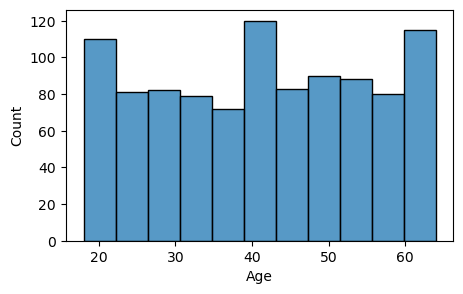

Histoplot of:- Total Amount


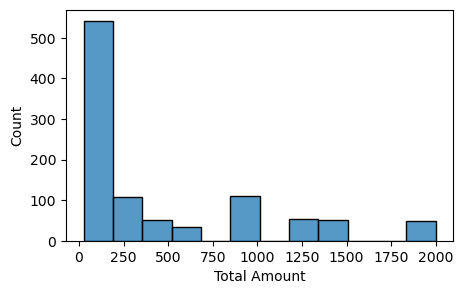

In [71]:
for i in num_cols:
    print("Histoplot of:-", i)
    plt.figure(figsize=(5,3))
    sns.histplot(x = sales_df[i])
    plt.show()
    

Boxplot of: Age


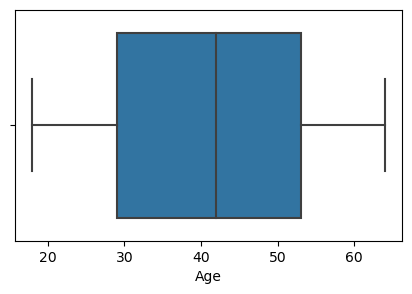

Boxplot of: Total Amount


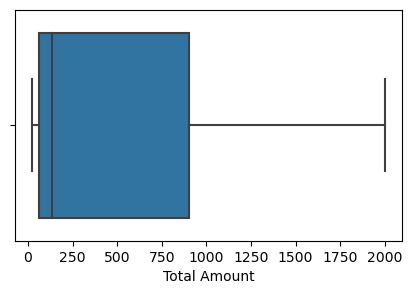

In [72]:
for i in num_cols:
    print("Boxplot of:",i)
    plt.figure(figsize)
    sns.boxplot(x=sales_df[i])
    plt.show()

Total Amount - The whister extending from the box show the range of data within 1.5 times the IQR from Q1 & Q3, the right whisker is longer indicating a right skewed distribution. A right skewed distribution means most transactions are of lower amounts, only few transactions are at higher amount.

Categorical Analysis 

Count plot of:- Gender


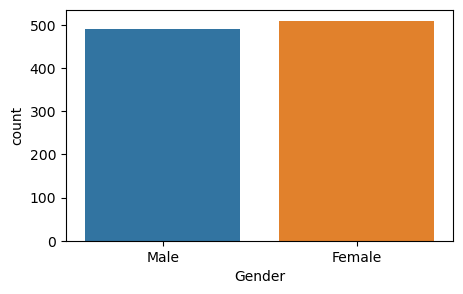

Count plot of:- Product Category


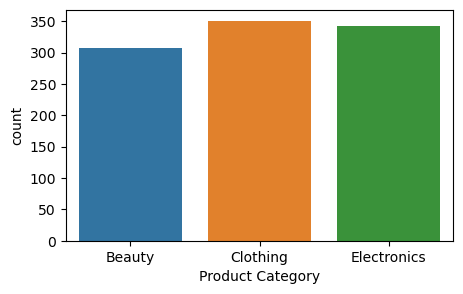

Count plot of:- Quantity


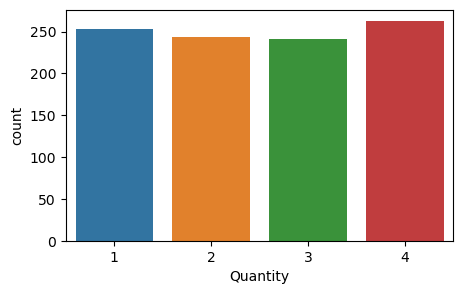

Count plot of:- Price per Unit


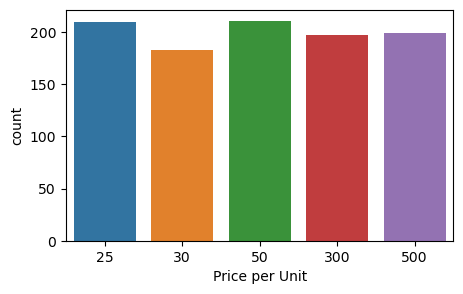

In [70]:
for i in cat_cols:
    print("Count plot of:-",i)
    plt.figure(figsize=(5,3))
    sns.countplot(x=sales_df[i])
    plt.show()

### Step 5.2: Bivariate Analysis

5.2.1 - Numerical Vs Numerical 

<Axes: xlabel='Age', ylabel='Total Amount'>

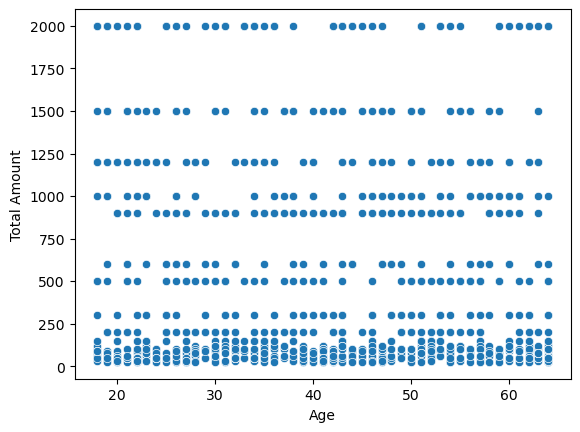

In [77]:
sns.scatterplot(x = sales_df["Age"], y = sales_df["Total Amount"])

Across all age groups, transactions exceeding 1500 are rare. The 26-35 and 36-45 groups seem to have both low and moderate spending clusters, potentially indicating sub-groups with differing financial behaviors. The small percentage that does exist is primarily found within the younger groups (18-35), indicating that younger consumers might occasionally make high-end purchases, possibly for luxury items or bulk purchases.

5.2.2 -  Numerical Vs Categorical

Boxplot of Gender Vs Age


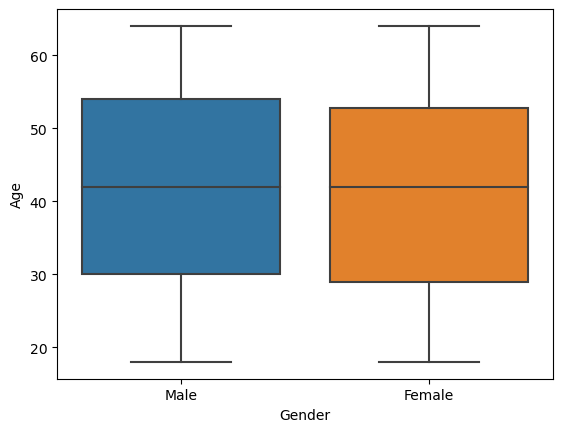

Boxplot of Gender Vs Total Amount


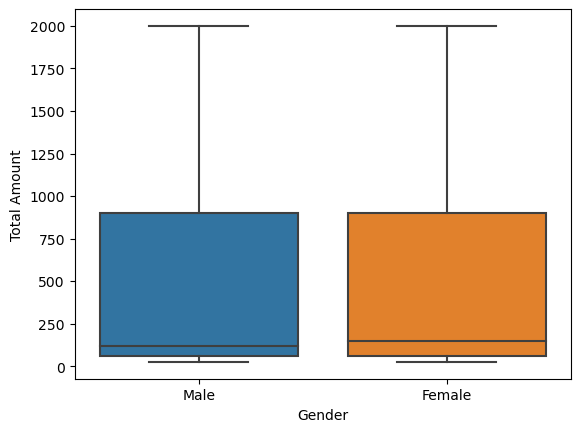

Boxplot of Product Category Vs Age


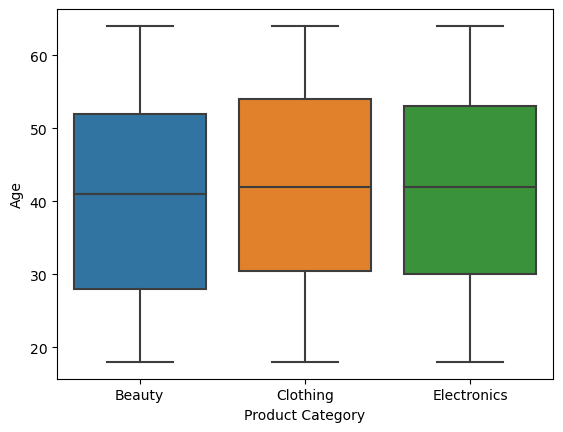

Boxplot of Product Category Vs Total Amount


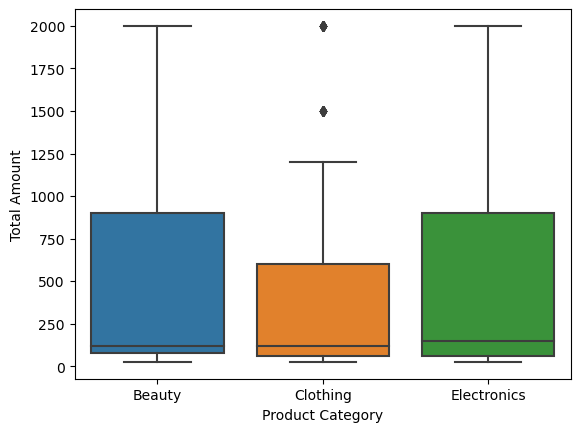

Boxplot of Quantity Vs Age


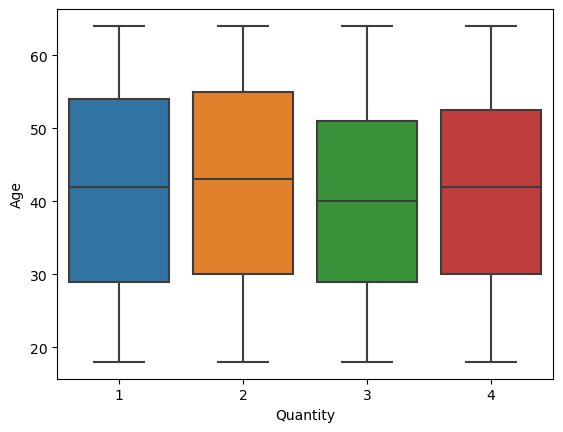

Boxplot of Quantity Vs Total Amount


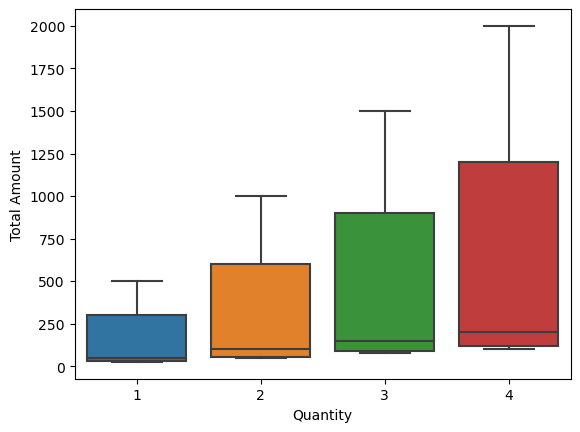

Boxplot of Price per Unit Vs Age


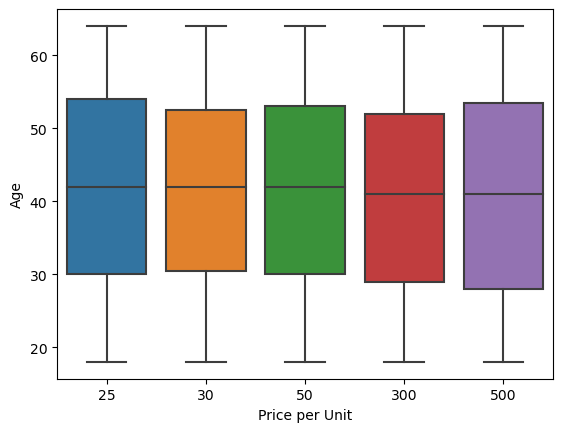

Boxplot of Price per Unit Vs Total Amount


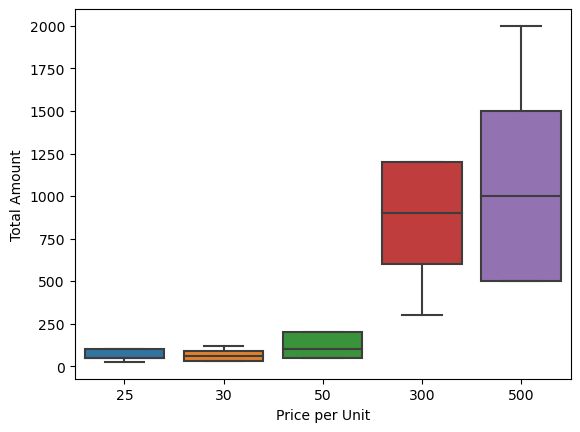

In [83]:
for col1 in cat_cols:
    for col2 in num_cols:
        print("Boxplot of", col1, "Vs", col2)
        sns.boxplot(x=sales_df[col1], y = sales_df[col2])
        plt.show()

Age Distribution Similarity: Both male and female customers exhibit a similar range and distribution in age, with the median around the early 40s.


<Axes: >

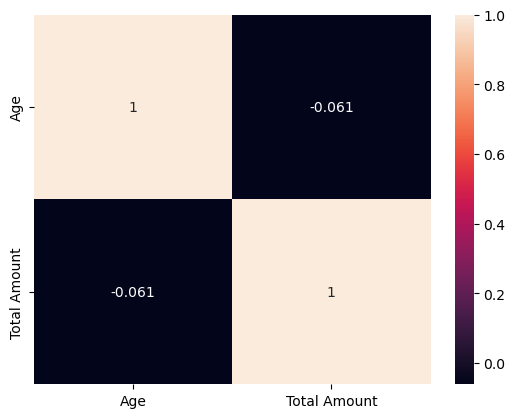

In [103]:
sns.heatmap(sales_df[num_cols].corr(),annot = True)